In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [27]:
BASE_DIR = os.getcwd()

DATASETS_DIR = os.path.join(BASE_DIR, "..", "datasets")

csv_path = os.path.join(DATASETS_DIR, "housing.csv")

data = pd.read_csv(csv_path)

In [28]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [31]:
from sklearn.model_selection import train_test_split

X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4522,-118.21,34.04,37.0,845.0,249.0,881.0,252.0,2.2454,<1H OCEAN,165000.0
3012,-118.95,34.83,18.0,3278.0,762.0,1338.0,550.0,2.9891,INLAND,116500.0
17127,-122.13,37.47,30.0,1480.0,294.0,1126.0,301.0,4.9830,NEAR BAY,166700.0
11763,-121.28,38.73,6.0,4223.0,672.0,1747.0,631.0,5.4190,INLAND,267400.0
3910,-118.53,34.20,26.0,2221.0,662.0,1998.0,603.0,2.8701,<1H OCEAN,191100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

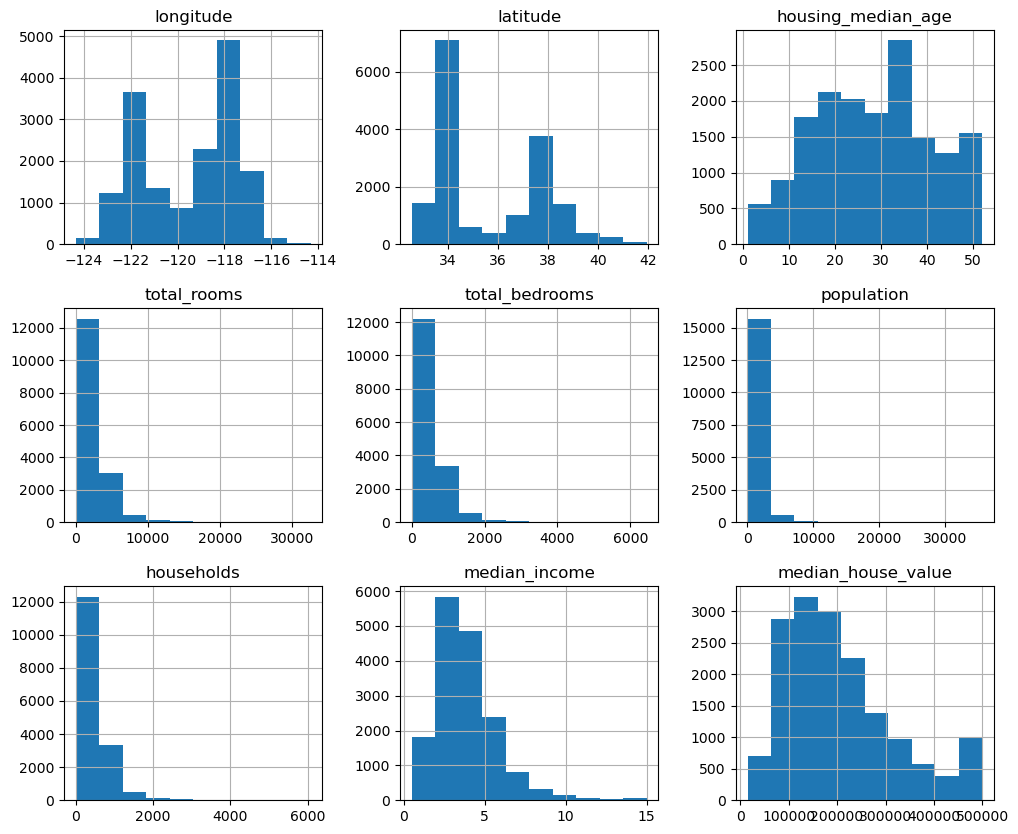

In [34]:
train_data.hist(figsize=(12, 10))

In [35]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.577538,35.642186,28.587422,2639.501162,539.382357,1427.631225,500.902056,3.864219,206496.320384
std,2.002517,2.137818,12.589122,2161.934079,419.015738,1135.470187,381.014579,1.901276,115329.947580
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1449.000000,296.000000,788.000000,281.000000,2.555600,119200.000000
50%,-118.510000,34.260000,29.000000,2137.000000,436.000000,1171.000000,410.500000,3.537500,179850.000000
75%,-118.010000,37.720000,37.000000,3145.000000,650.000000,1727.000000,607.000000,4.741925,263675.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


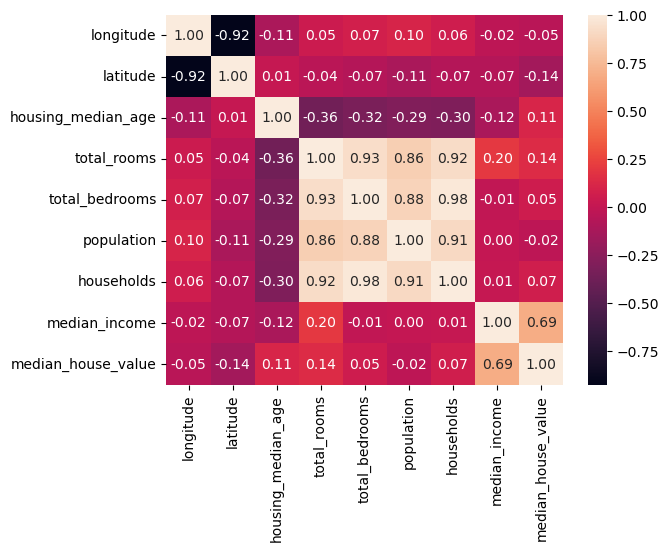

In [36]:
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

In [37]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [38]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7215
INLAND        5222
NEAR OCEAN    2092
NEAR BAY      1814
ISLAND           3
Name: count, dtype: int64

In [39]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop("ocean_proximity", axis=1)

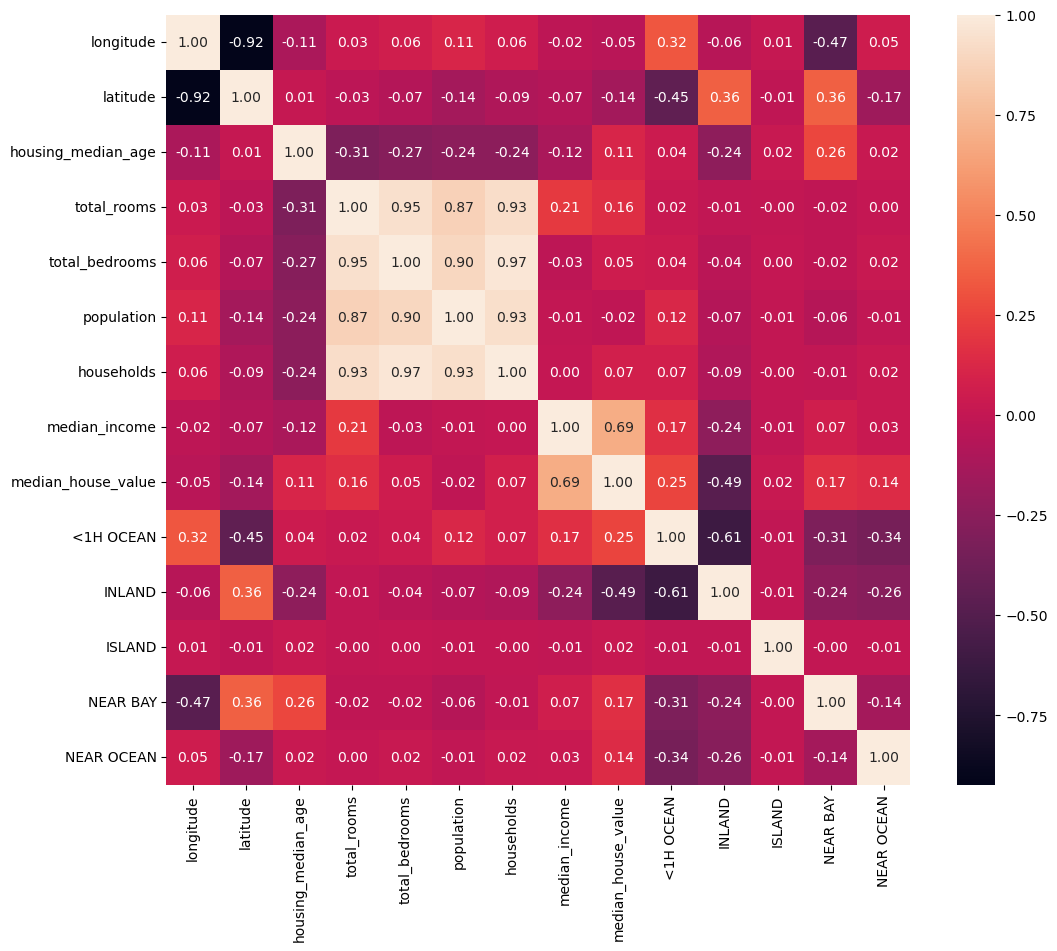

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

In [42]:
train_data.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687298
<1H OCEAN             0.254644
NEAR BAY              0.165710
total_rooms           0.158396
NEAR OCEAN            0.142352
housing_median_age    0.106152
households            0.072771
total_bedrooms        0.052719
ISLAND                0.021351
population           -0.020451
longitude            -0.049175
latitude             -0.142336
INLAND               -0.485424
Name: median_house_value, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

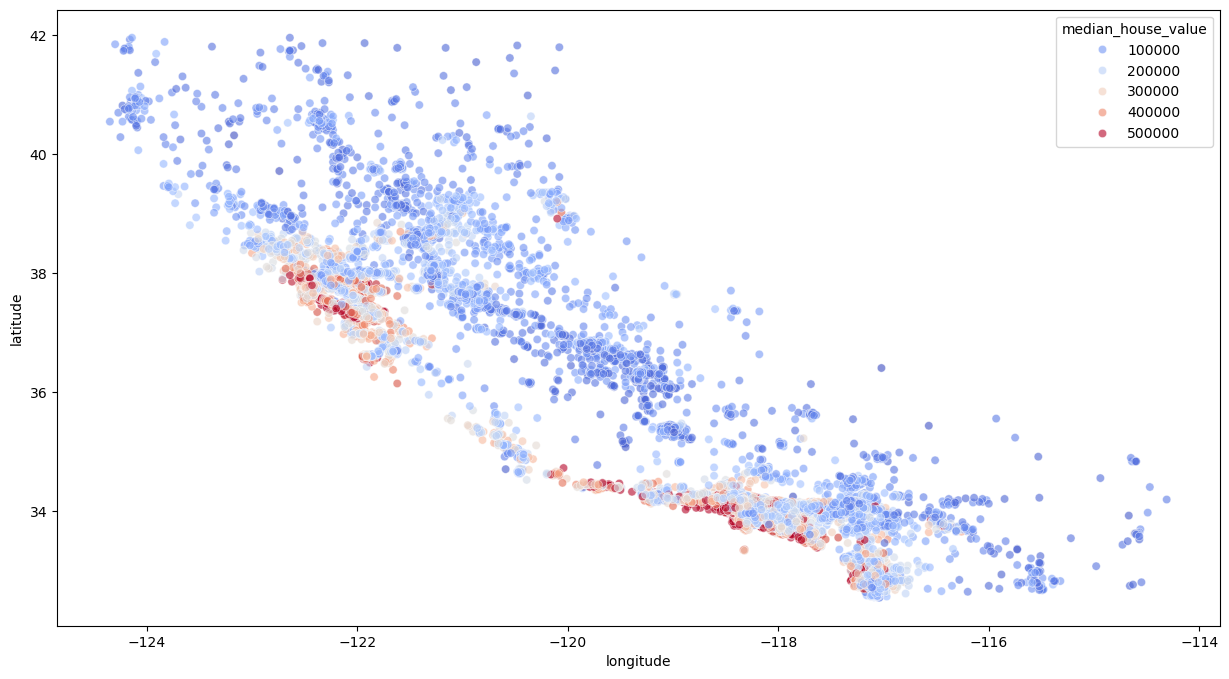

In [45]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train_data, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', alpha=0.6)